<a href="https://colab.research.google.com/github/junanote/test_deeplearning/blob/master/reuter_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import tensorflow as tf

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [4]:
 print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [5]:
len(x_train[50]),len(x_train[400]),len(x_train[200]) 

(118, 90, 212)

In [6]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [7]:
import numpy as np


In [8]:
np.unique(y_train).shape

(46,)

# make model

In [9]:
model = tf.keras.models.Sequential()

In [14]:
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=24, input_length=500)) # input layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
#model.add(tf.keras.layers.Flatten()) # hidden layer

model.add(tf.keras.layers.Dense(46, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget


In [21]:
#hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128)
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256)

Epoch 1/5
50/50 [==============================] - 7s 142ms/step - loss: 2.4146 - acc: 0.3510 - val_loss: 2.3828 - val_acc: 0.3532
Epoch 2/5
50/50 [==============================] - 7s 140ms/step - loss: 2.4137 - acc: 0.3510 - val_loss: 2.3821 - val_acc: 0.3532
Epoch 3/5
50/50 [==============================] - 7s 139ms/step - loss: 2.4132 - acc: 0.3510 - val_loss: 2.3823 - val_acc: 0.3532
Epoch 4/5
50/50 [==============================] - 7s 139ms/step - loss: 2.4135 - acc: 0.3510 - val_loss: 2.3823 - val_acc: 0.3532
Epoch 5/5
50/50 [==============================] - 7s 142ms/step - loss: 2.4127 - acc: 0.3510 - val_loss: 2.3820 - val_acc: 0.3532


# Evaluation

In [18]:
# 학습 시켰던 데이터
model.evaluate(pad_x_train, y_train)

281/281 [==============================] - 12s 43ms/step - loss: 2.4048 - acc: 0.3517


[2.404846668243408, 0.351703405380249]

# TEST 전처리 및 function만들기

In [19]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)  

In [25]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [27]:
pad_make_x = pad_make(x_test)

In [28]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 3s 42ms/step - loss: 2.4151 - acc: 0.3620


[2.415135622024536, 0.36197686195373535]

In [20]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 3s 43ms/step - loss: 2.4172 - acc: 0.3620


[2.417151927947998, 0.36197686195373535]

In [22]:
import matplotlib.pyplot as plt


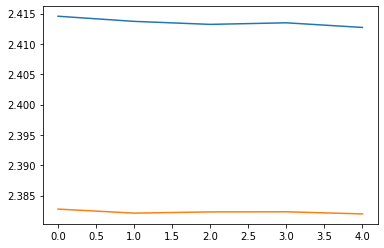

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

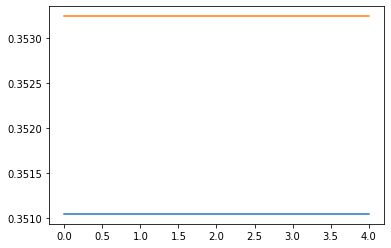

In [24]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()
